In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/data_cardiovascular_risk.csv'

In [ ]:
data = pd.read_csv(path , index_col = "id")

In [ ]:

# Checking shape pf dataframe
data.shape

(3390, 16)

In [ ]:

# Checking top 5 records in dataframe
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:

# Checking bottom 5 records in dataframe
data.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [ ]:

data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

MISSING VALUE TREATMENT

In [ ]:
# Missing data counts and percentage
missing = data.columns[data.isnull().any()].tolist()

print('Missing Data Count')
print(data[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(data[missing].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [ ]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  data[col] = data[col].fillna(data[col].median())

EXPLORATORY DATA ANALYSIS

In [ ]:
# Lets check the discrete and continuous features
categorical_features = [i for i in data.columns if data[i].nunique()<=4]
numeric_features = [i for i in data.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


HANDLING OUTLIERS

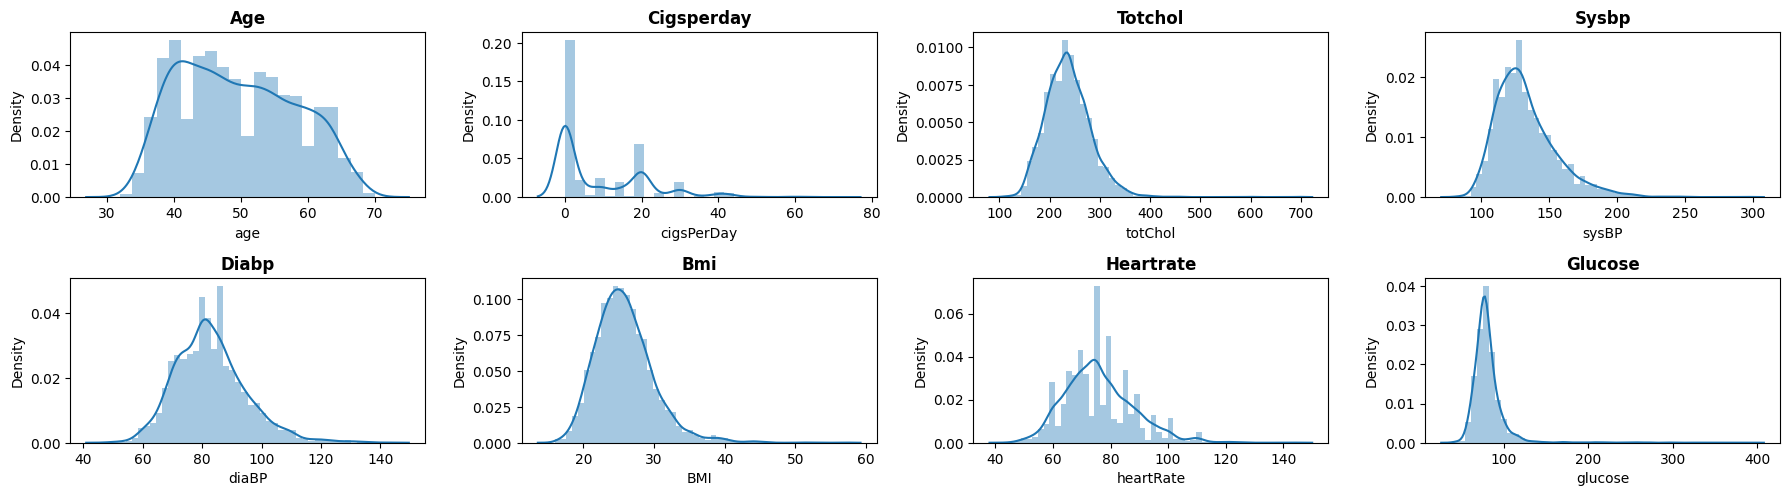

In [ ]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

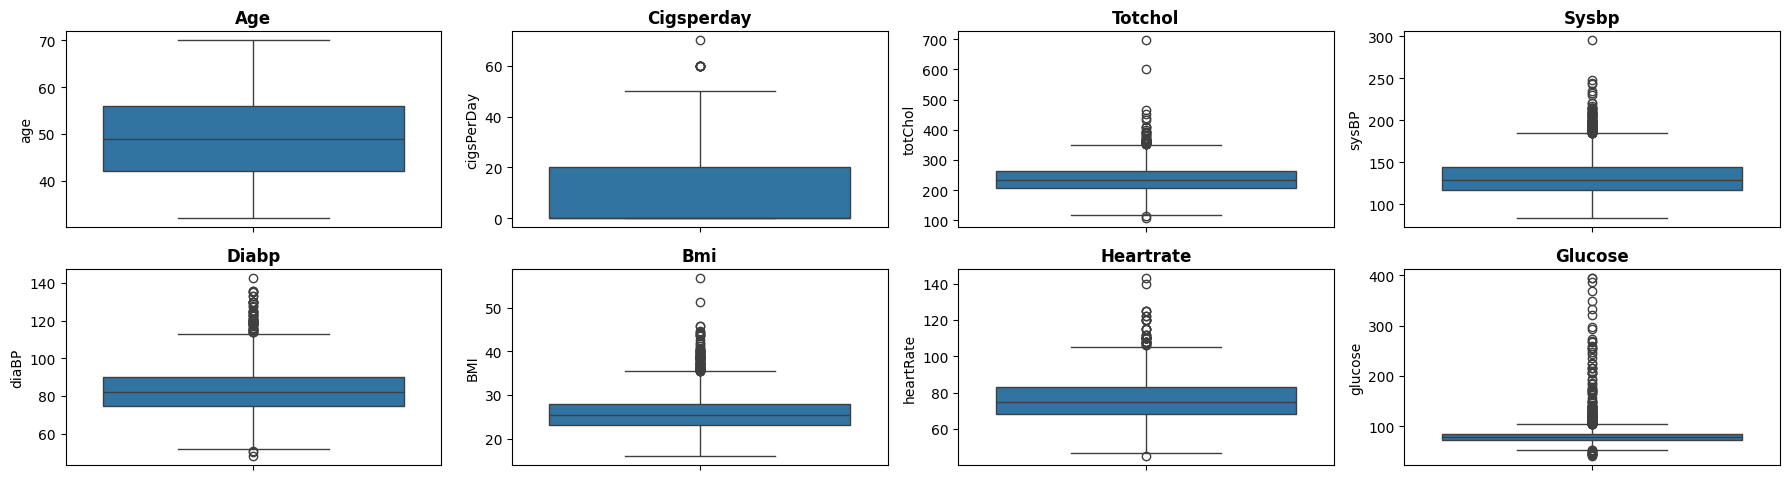

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:

# Removing outliers by standard methods and Plotting graphs:
df = data.copy()
for col in numeric_features:
  # Using IQR method to define the range of inliners:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,df[col]))

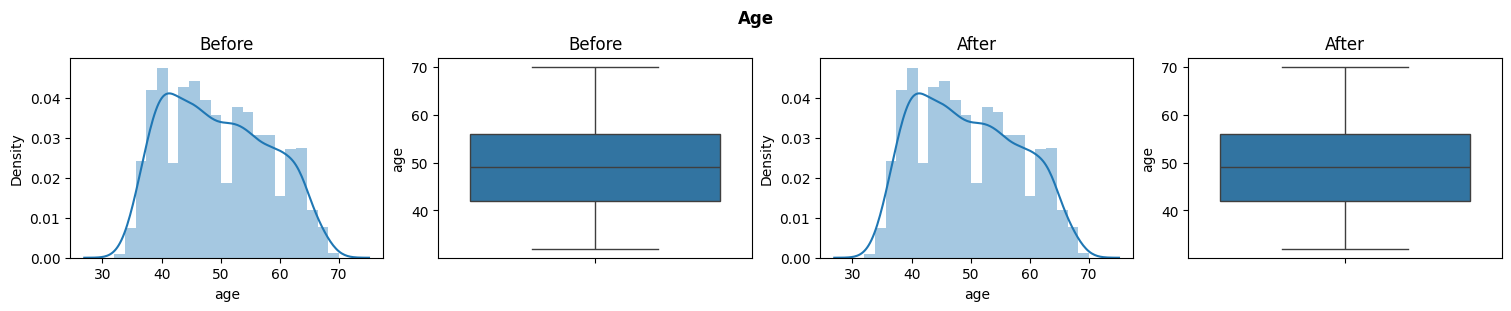

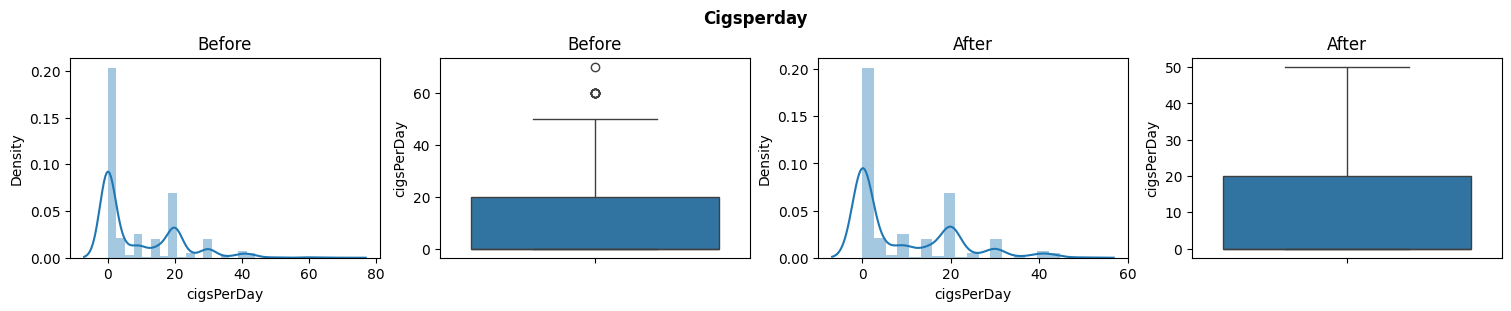

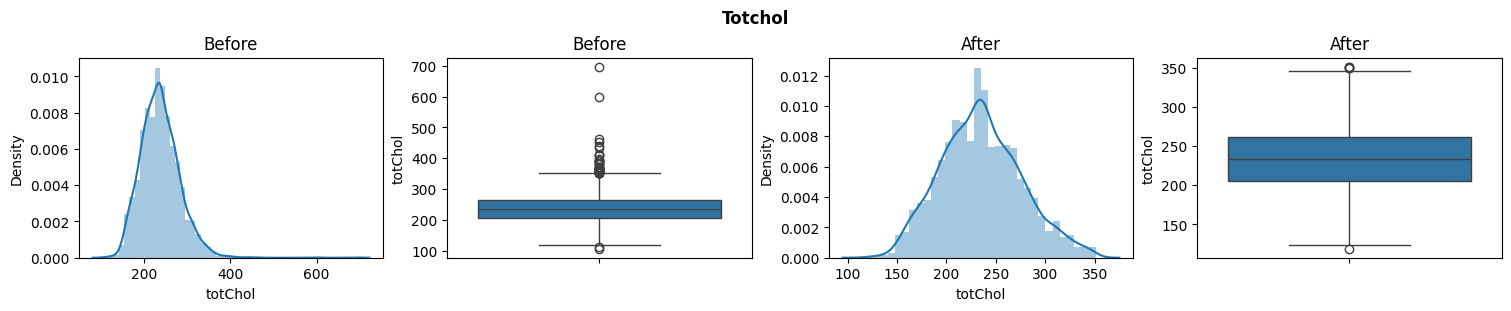

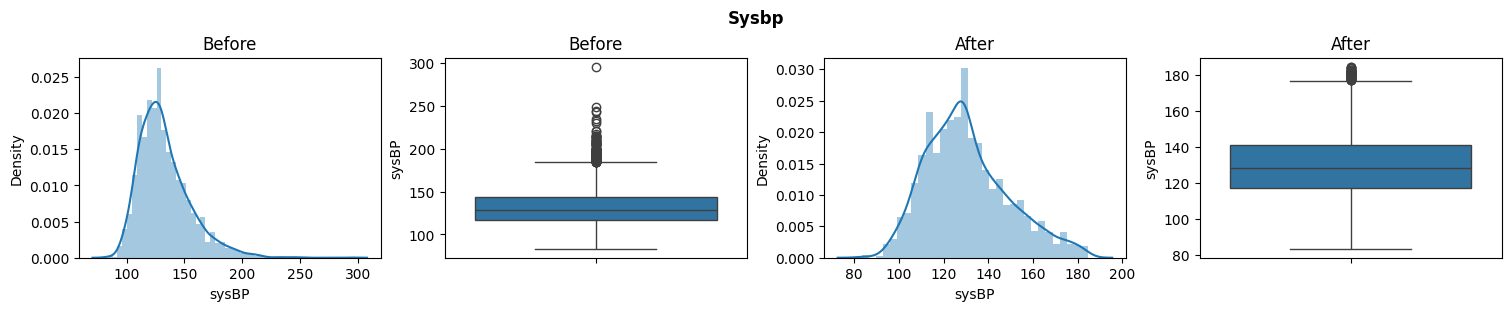

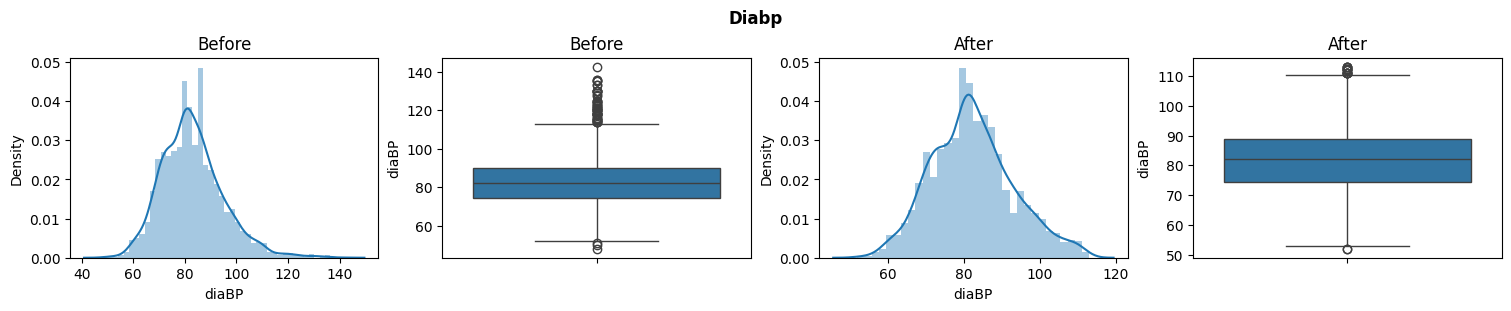

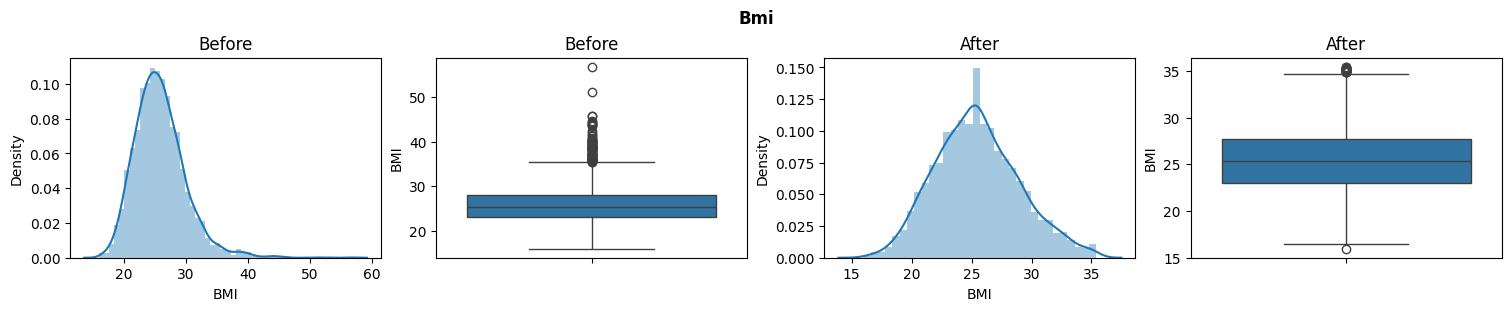

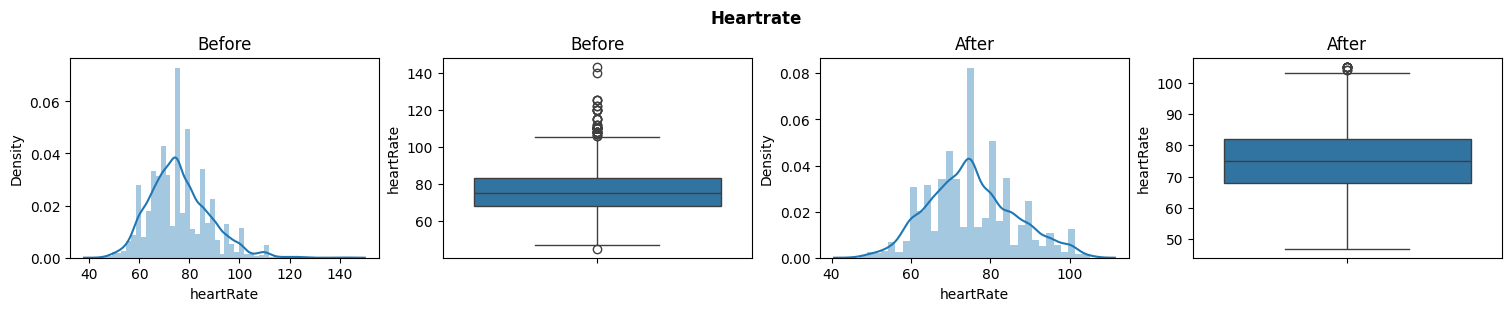

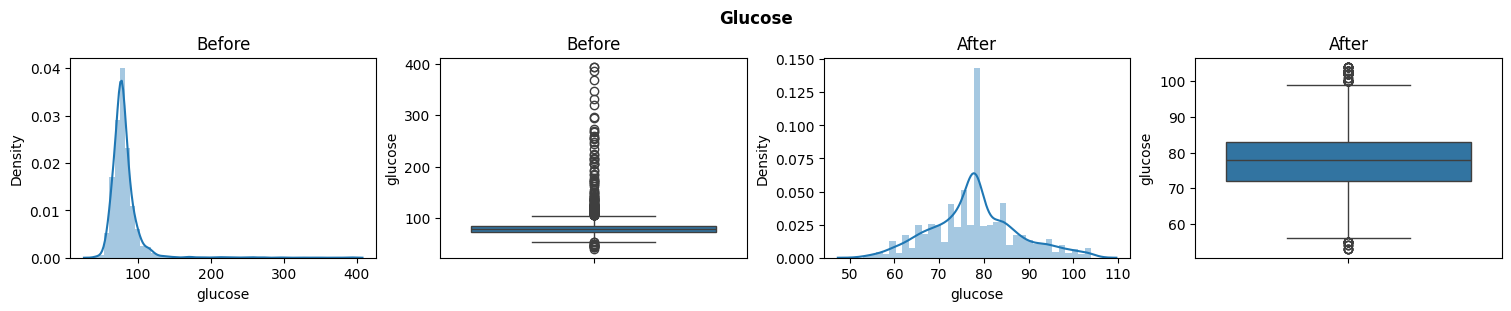

In [ ]:
# Plotting Graphs Before treating outliers
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(data[col], ax=ax[0]).set(title="Before")
  sns.boxplot(data[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df[col], ax=ax[2]).set(title="After")
  sns.boxplot(df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

CLEANING AND MANIPULATING DATASET

In [ ]:

# Checking duplicates
print(len(df[df.duplicated()]))

0


In [ ]:

# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking']:
  print(df[col].value_counts(),'\n')

sex
F    1923
M    1467
Name: count, dtype: int64 

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64 



In [ ]:

# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)

In [ ]:

# Checking Whether all features are numeric or not
len(df.columns) == len(df.describe().columns)

True

In [ ]:

# New look
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


UNIVARITE ANALYSIS

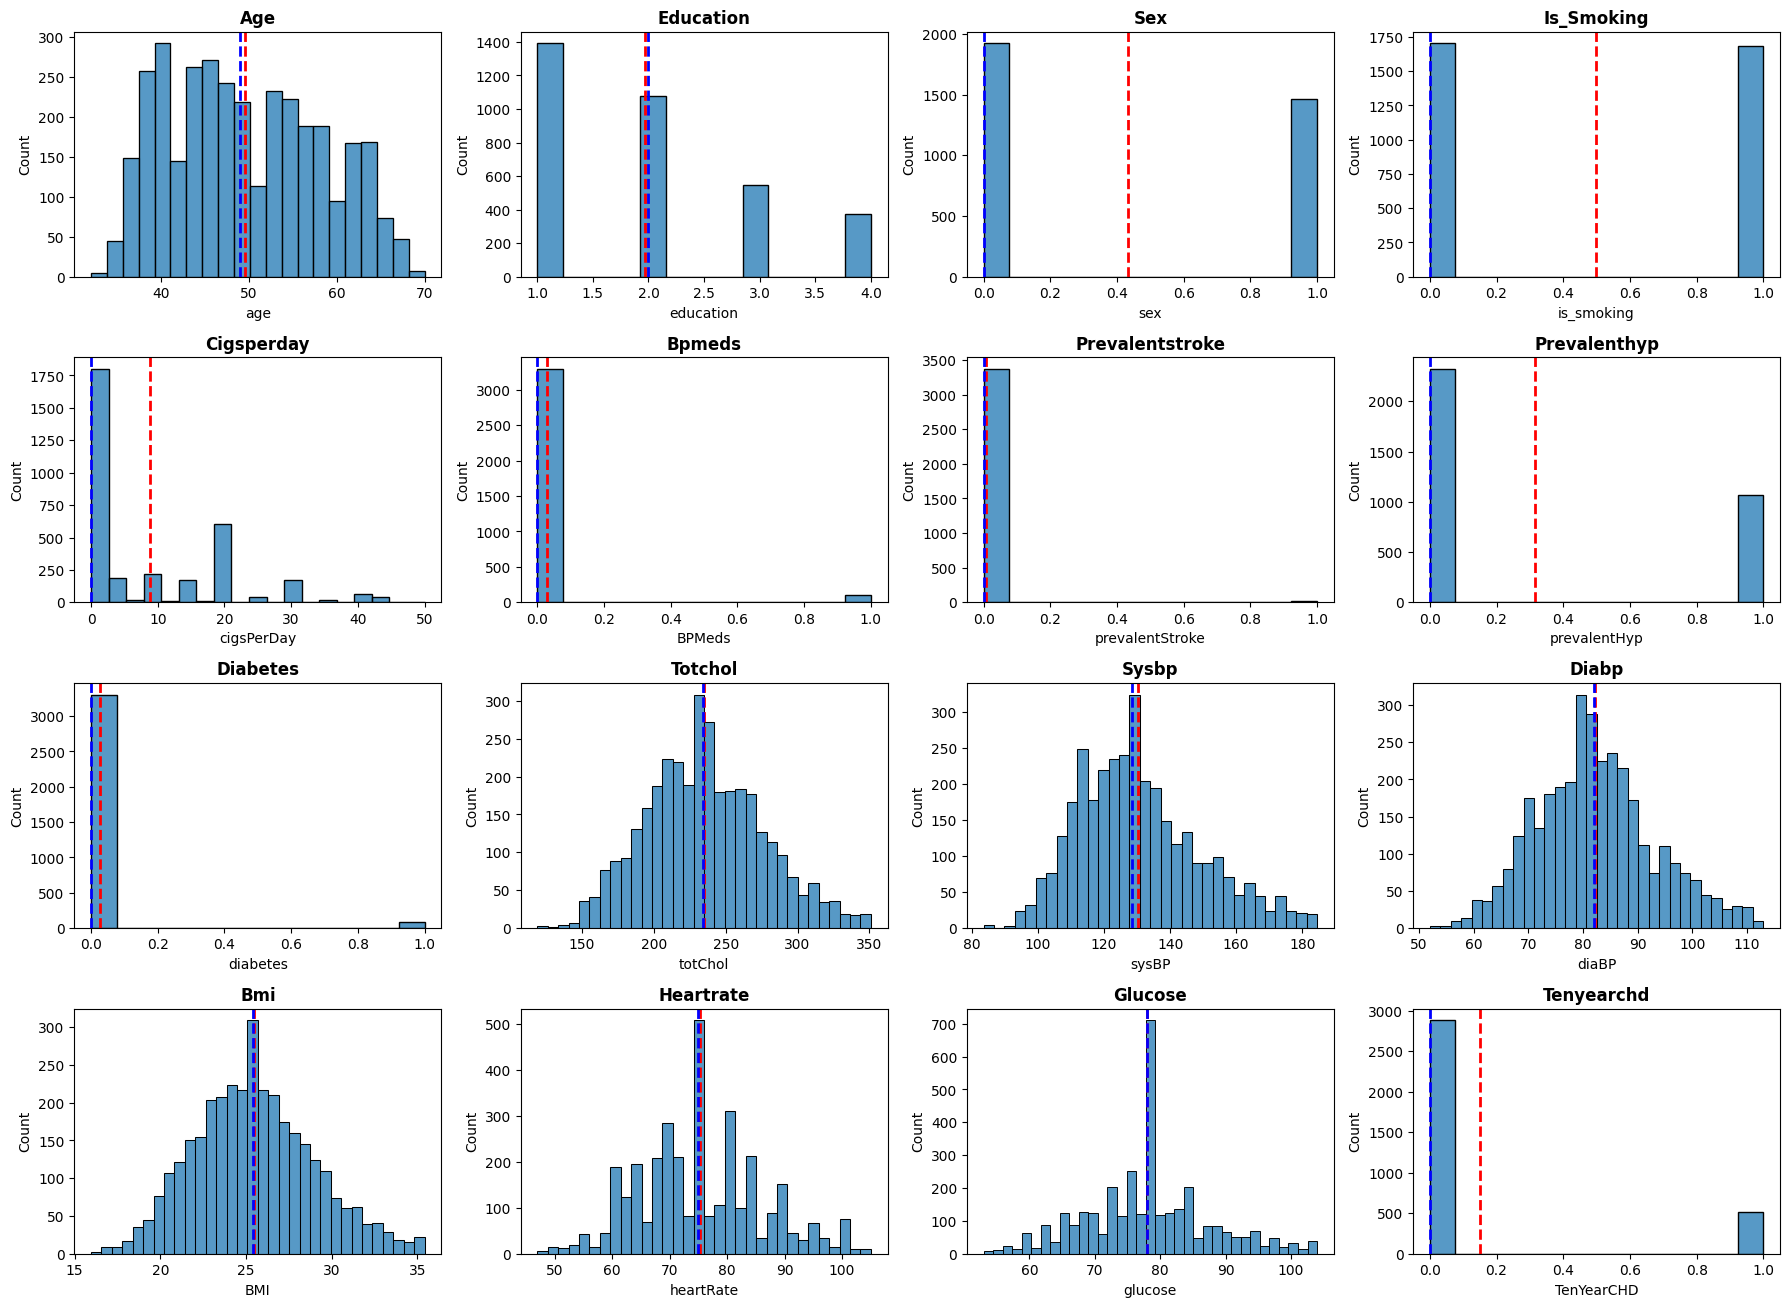

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

BIVARIATE ANALYSIS

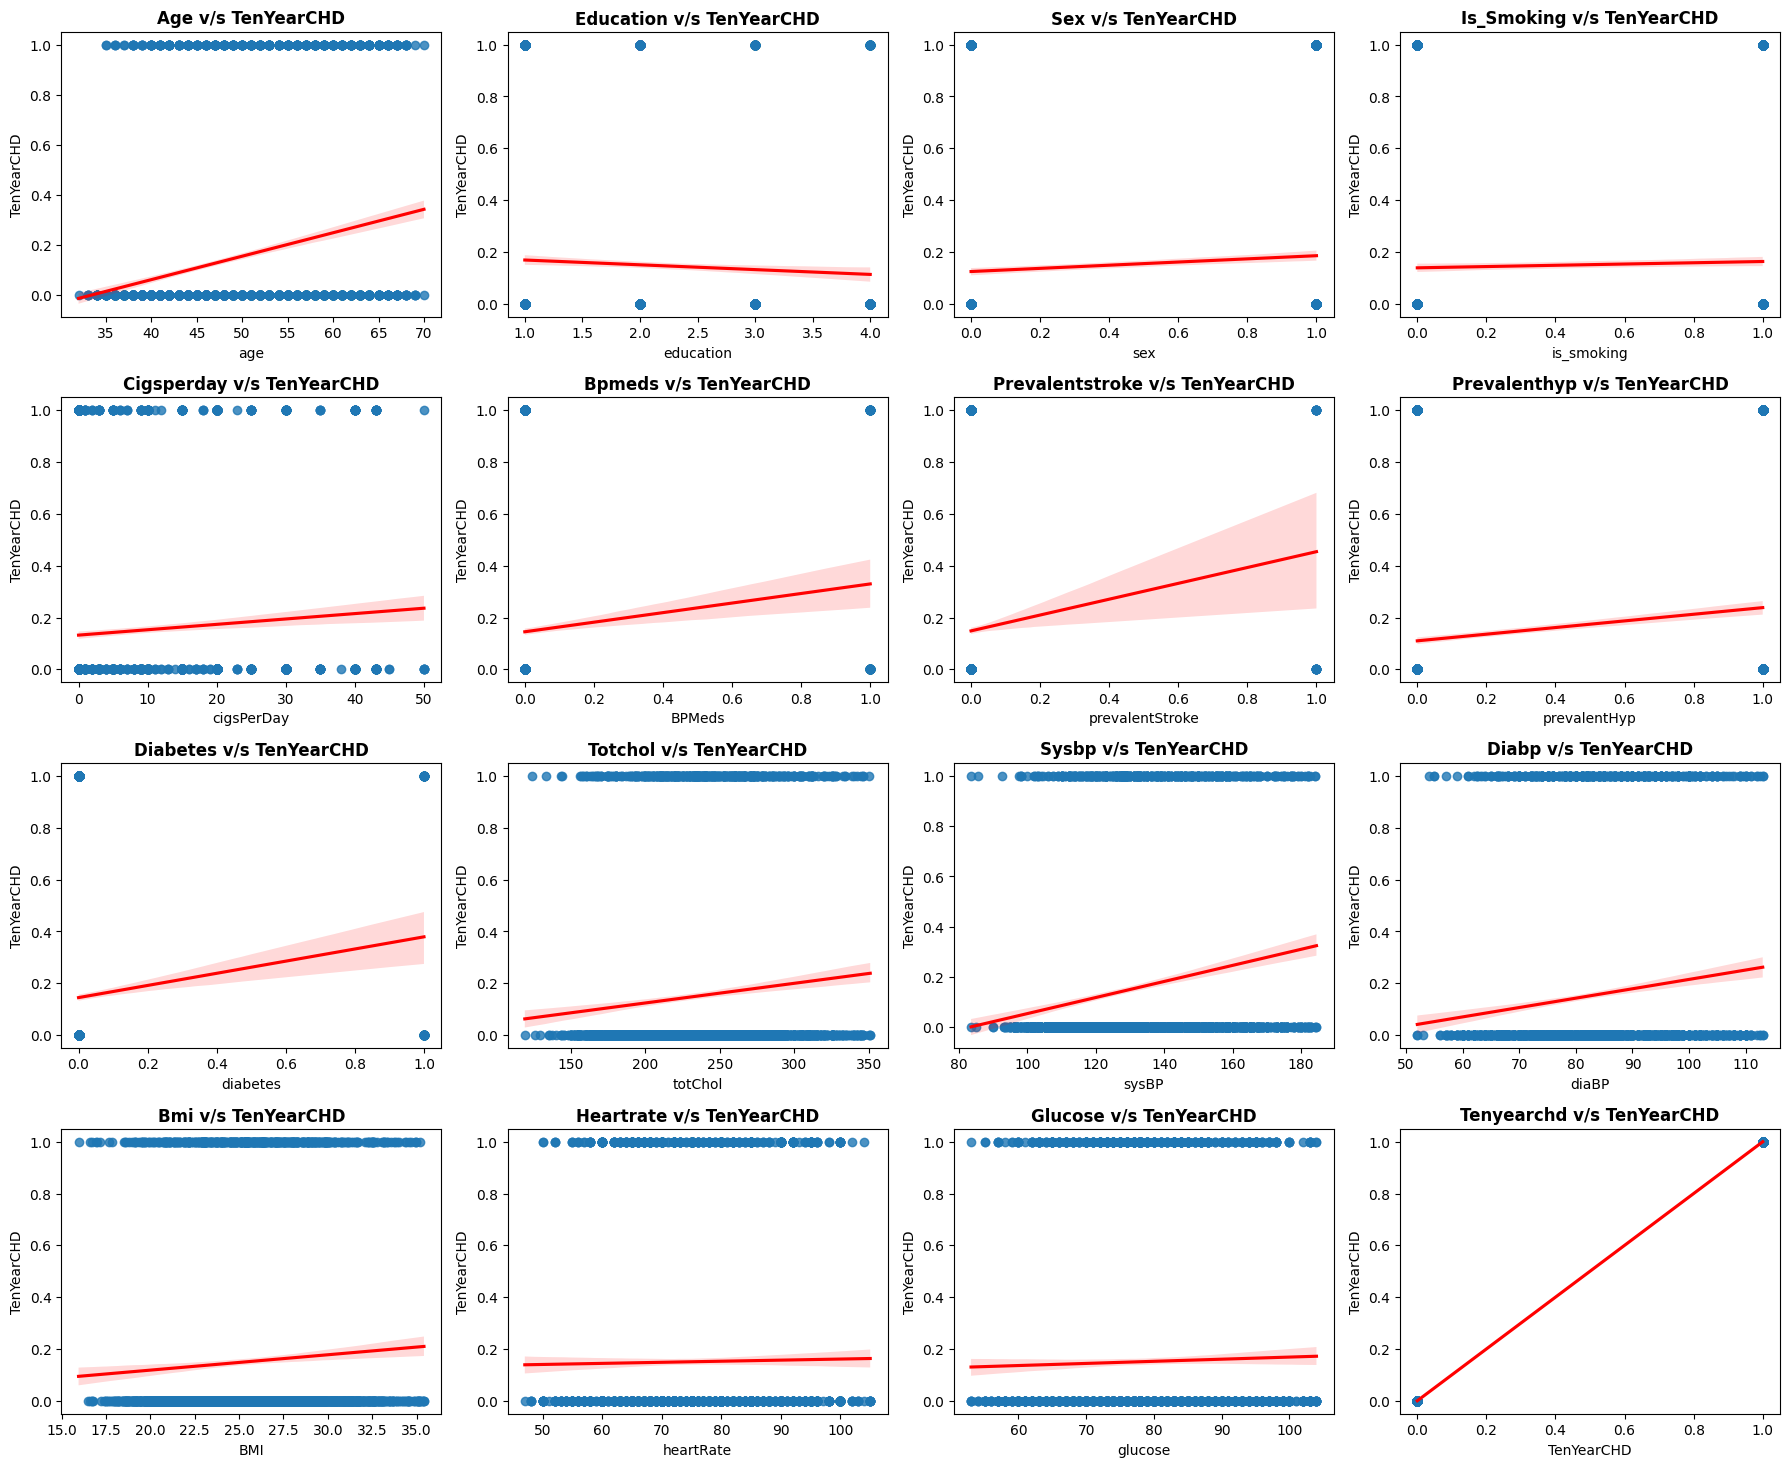

In [ ]:
# Checking Linearity
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(18,18))
for n,column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

REMOVING MULTICOLINEARITY

In [ ]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

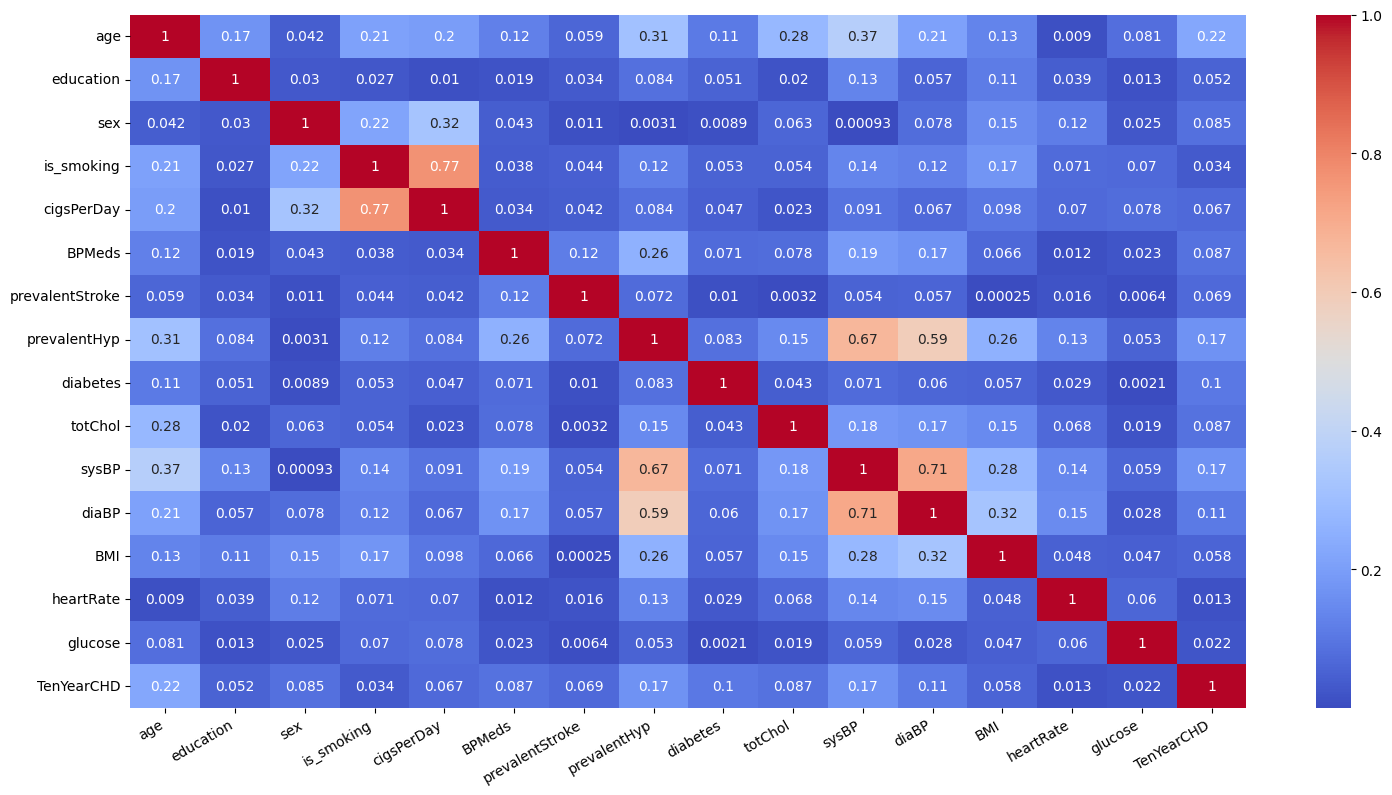

In [ ]:

# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:

# Checking VIF for each variable
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
calc_vif(df[independent_variables])

,variables,VIF
0,sysBP,132.679399
1,diaBP,127.335444
2,BMI,58.839938
3,glucose,55.695887
4,heartRate,47.760133
5,age,42.764967
6,totChol,37.646845
7,is_smoking,4.955409
8,education,4.831856
9,cigsPerDay,4.195606


In [ ]:

# Summer and Winter are highly correlated with temperature. Hence removing them
independent_variables = [i for i in df.columns if i not in ['TenYearCHD','sysBP','diaBP','glucose',
                                                            'BMI','totChol','heartRate','is_smoking']]
calc_vif(df[independent_variables])

,variables,VIF
0,age,5.513455
1,education,4.100370
2,sex,1.968156
3,cigsPerDay,1.733136
4,prevalentHyp,1.686226
5,BPMeds,1.120401
6,diabetes,1.044716
7,prevalentStroke,1.024945


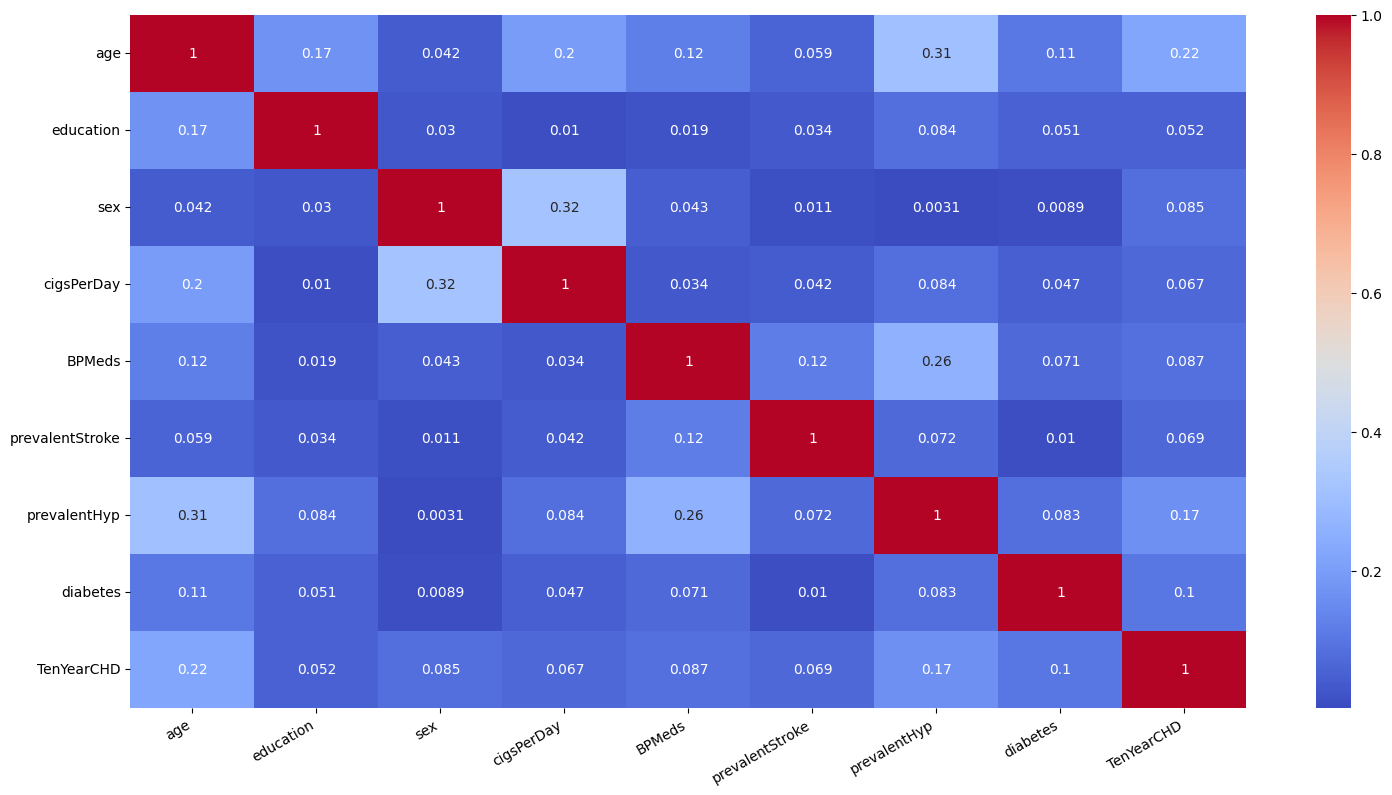

In [ ]:

# Updating the dataset
dataset = df[independent_variables + ['TenYearCHD']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
# Checking top 5 rows of the cleaned dataset
dataset.head()


,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
id,,,,,,,,,
0,64.0,2.0,0,3.0,0.0,0,0,0,1
1,36.0,4.0,1,0.0,0.0,0,1,0,0
2,46.0,1.0,0,10.0,0.0,0,0,0,0
3,50.0,1.0,1,20.0,0.0,0,1,0,1
4,64.0,1.0,0,30.0,0.0,0,0,0,0


MODEL BUILDING

In [ ]:

# Defining variables required
scaler = MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
features = [i for i in df.columns if i not in ['TenYearCHD']]

# Splitting the data into train and test
X = scaler.fit_transform(df[independent_variables])
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

# Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
TenYearCHD
0    2305
1     407
Name: count, dtype: int64 

After Handling Class Imbalace:
TenYearCHD
0    2199
1    2199
Name: count, dtype: int64 



In [ ]:

# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')

    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

LOGISTIC REGRESSION

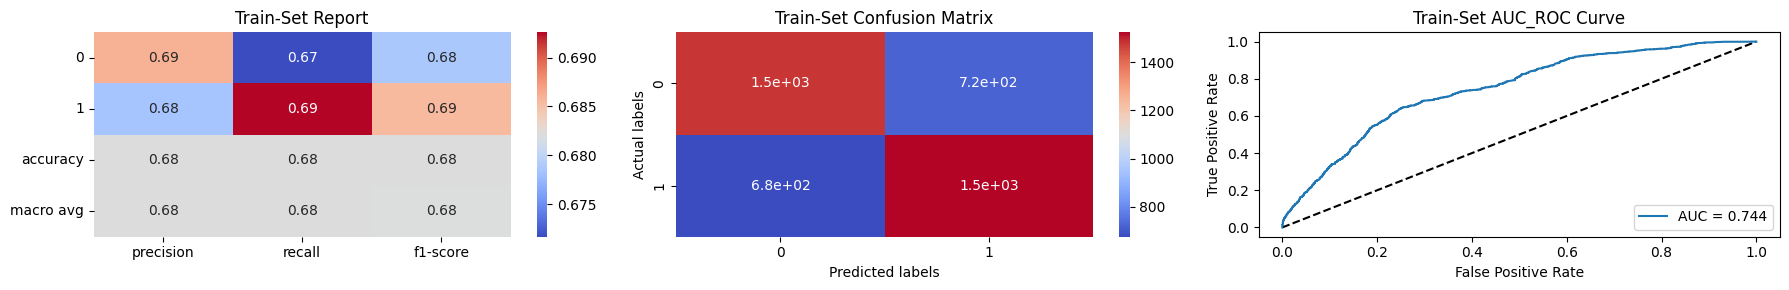

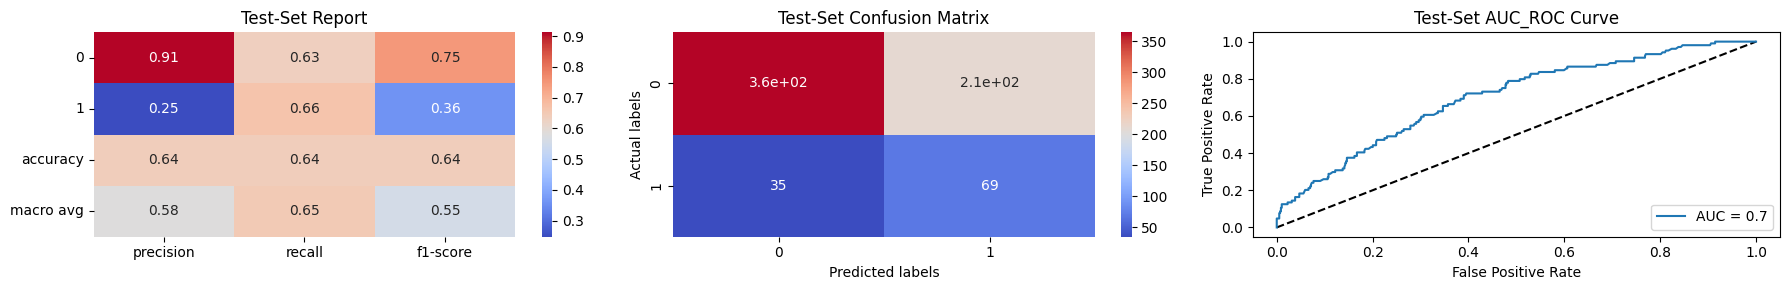

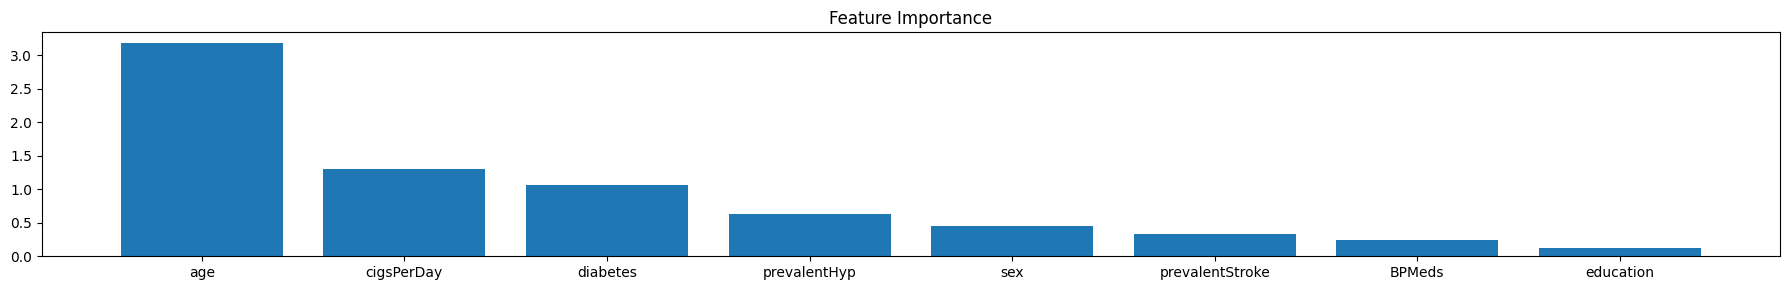

LogisticRegression(max_iter=10000)

In [ ]:
# Fitting Logistic Regression Model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
analyse_model(lr, X_smote, X_test, y_smote, y_test)

NAIVE BAYES CLASSIFIER

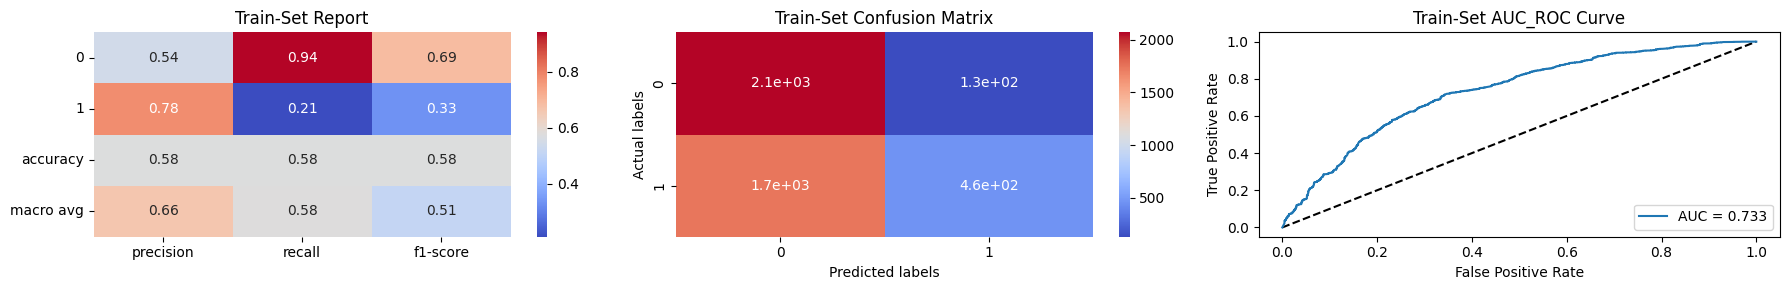

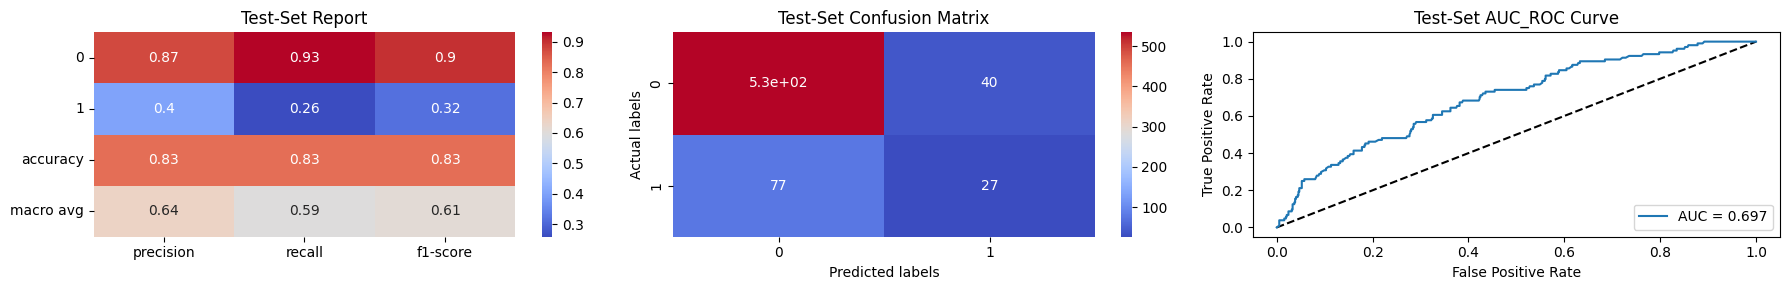

<Figure size 1800x300 with 0 Axes>

GaussianNB()

In [ ]:

# Fitting Naive Bayes Classifier
nbc = GaussianNB()
analyse_model(nbc, X_smote, X_test, y_smote, y_test)

SVM

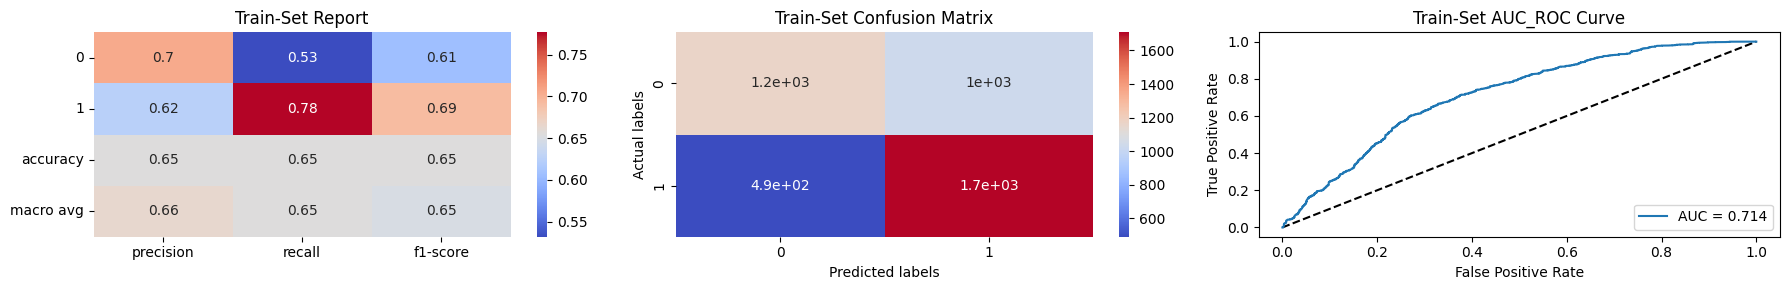

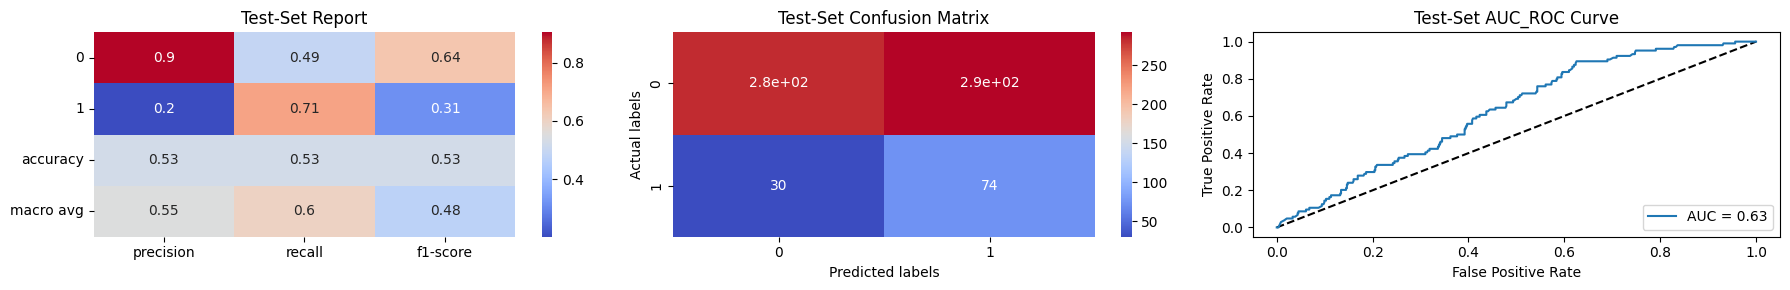

<Figure size 1800x300 with 0 Axes>

SVC(C=0.1, max_iter=1000, probability=True, random_state=0)

In [ ]:
# SVM algorithm
clf = SVC(random_state= 0,probability=True)

# HYperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"],
        'C': [0.1, 1, 10, 100],
        'max_iter' : [1000]}

# GridSearch to find the best parameters
svc = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
svc.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(svc.best_estimator_, X_smote, X_test, y_smote, y_test)

RANDOM FOREST CLASSIFIER

In [ ]:
# Splitting the data into train and test by redefining X
X = scaler.fit_transform(df[features])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

# Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=45).fit_resample(X_train, y_train)

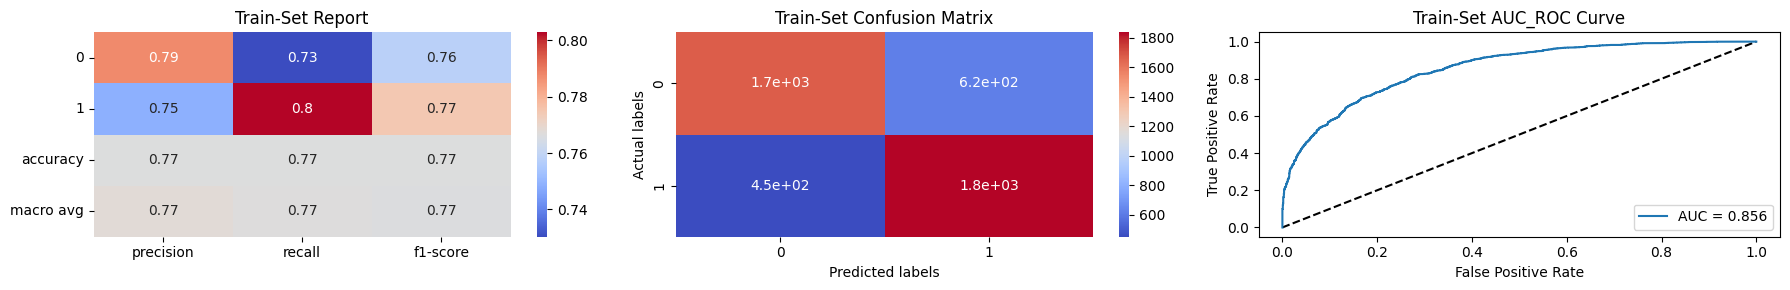

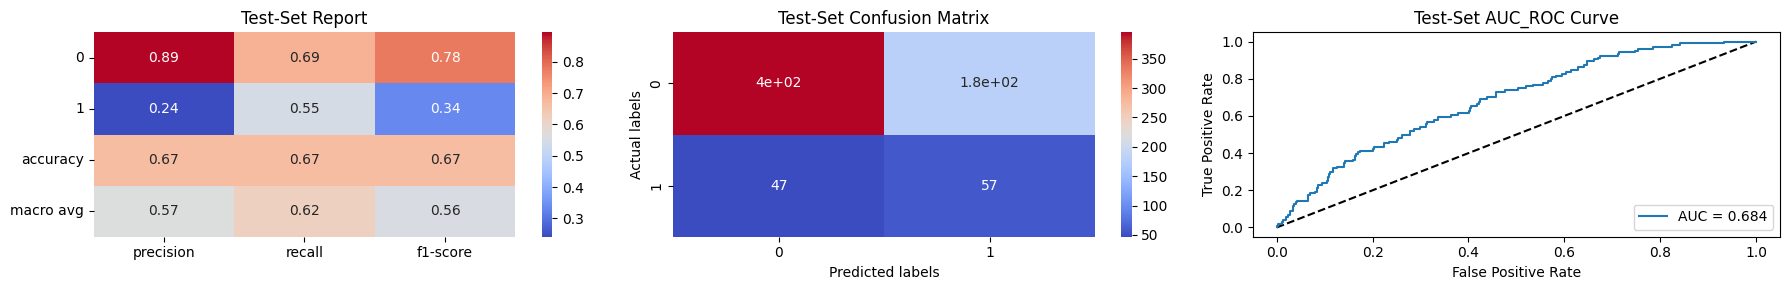

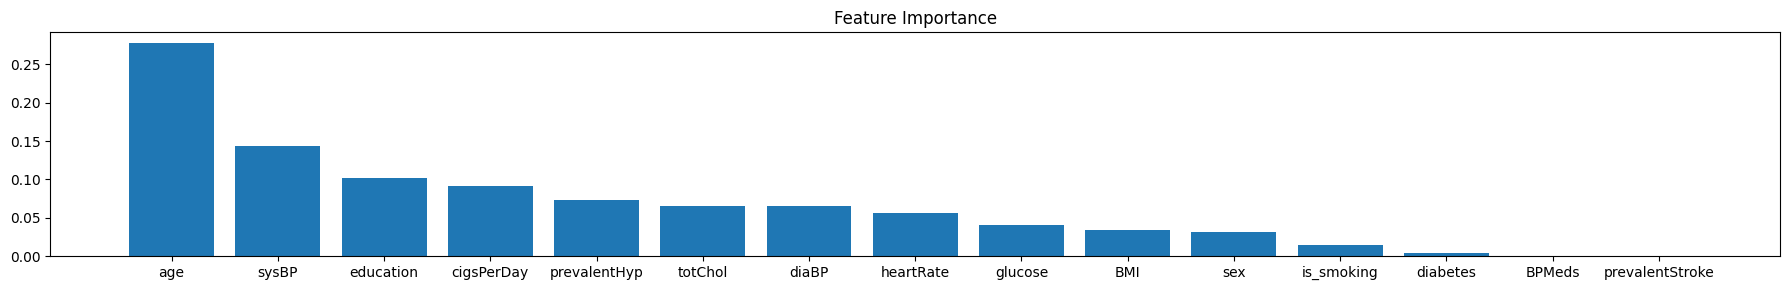

RandomForestClassifier(max_depth=8, min_samples_leaf=46, min_samples_split=50,
                       random_state=2)

In [ ]:

# Classifier
clf = RandomForestClassifier(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}

# GridSearch to find the best parameters
rf = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
rf.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(rf.best_estimator_, X_smote, X_test, y_smote, y_test)

XGBOOST CLASSIFIER

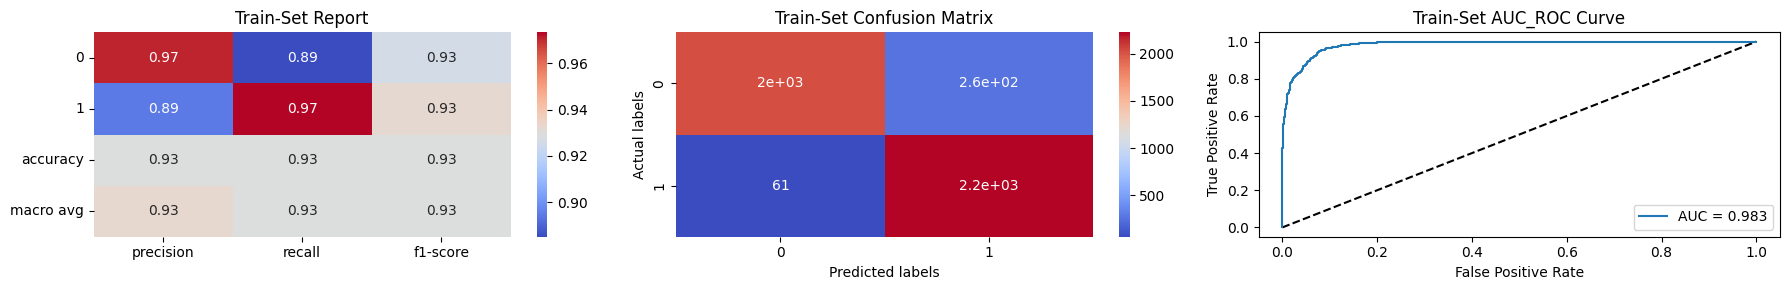

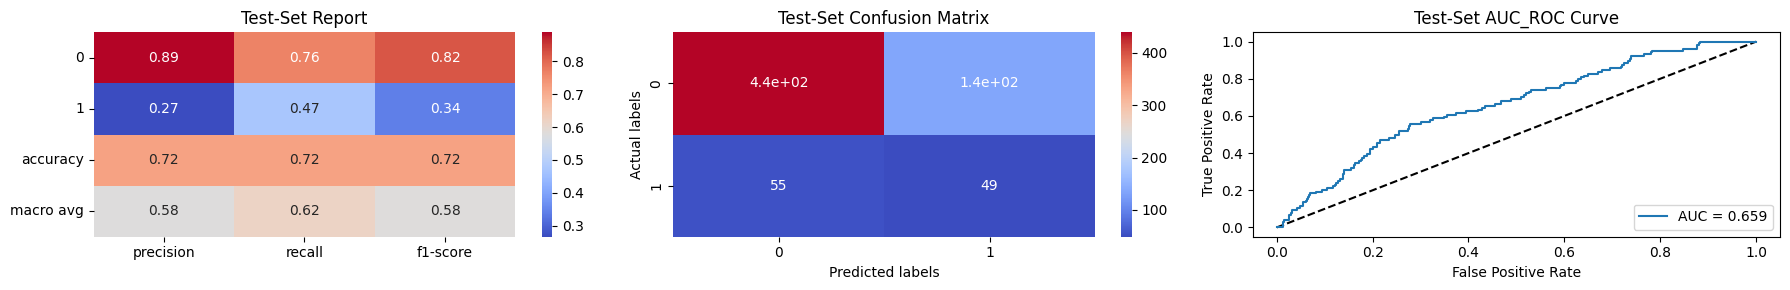

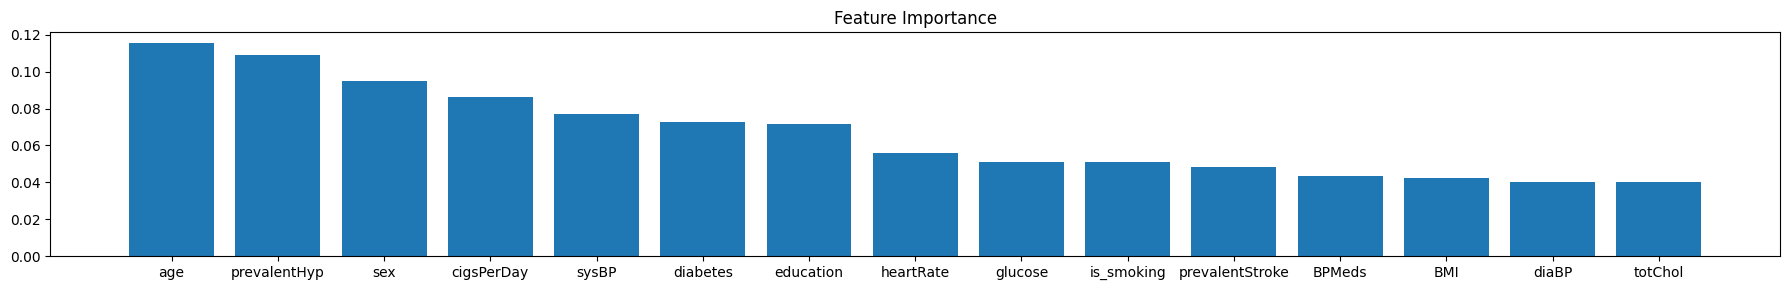

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False, eta=0.05,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, min_samples_leaf=30,
                min_samples_split=50, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, ...)

In [ ]:

# Classifier
clf = XGBRFClassifier(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
xgb.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_smote, X_test, y_smote, y_test)

KNN CLASSIFIER

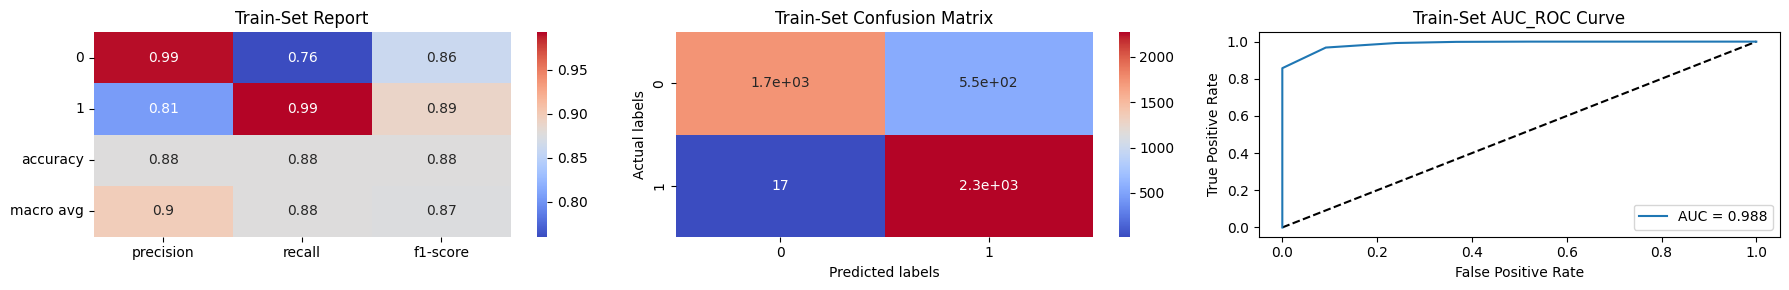

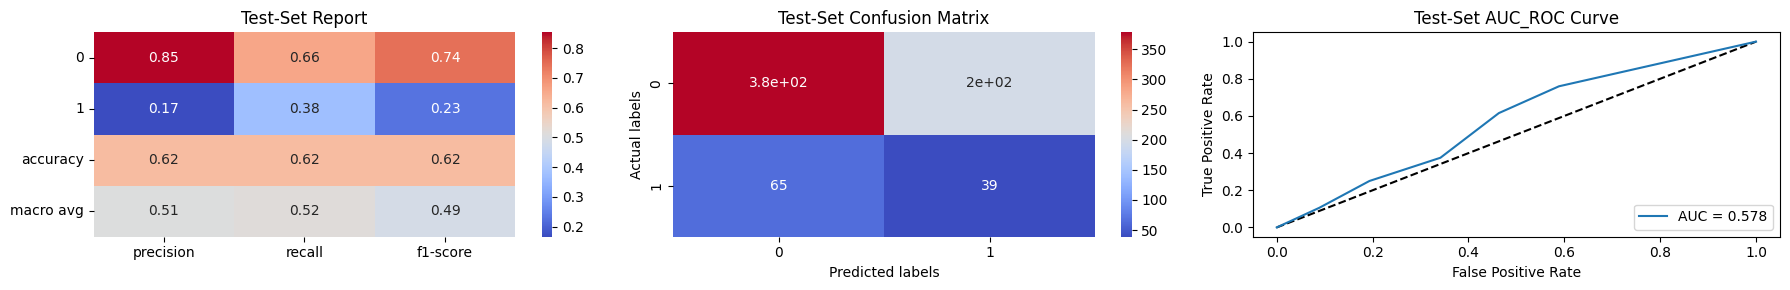

<Figure size 1800x300 with 0 Axes>

KNeighborsClassifier(metric='manhattan')

In [ ]:
# Classifier
clf = KNeighborsClassifier()

# HYperparameter Grid
grid = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knn = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
knn.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(knn.best_estimator_, X_smote, X_test, y_smote, y_test)